# Life expectancy vs GDP

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

Prerequisites:
* Data Acquisition
* Data Visualization
* Hypothesis Testing
* Summarizing Quantitative Data
* Data Wrangling and Tidying
* Data Manipulation with Pandas

First let's import neccessary libriraries. As well load and inspect the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data.csv")
print(df.head())
print(df.info())
print(df.describe())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
co

Lets inspect depper make some simple adjustments and calculate some basic statistics

In [2]:
# Renaming life expectancy name column to make simplier
df = df.rename(columns={'Life expectancy at birth (years)': 'life_exp'})

# Life expectancy and GDP mean calculations
for i in df.Country.unique():
    b = df[(df.Country == i)]
    print("{} average life expectancy for period 2000-2015 is {} years and GDP of {}$".format(i, round(np.mean(b.life_exp)), round(np.mean(b.GDP))))


Chile average life expectancy for period 2000-2015 is 79 years and GDP of 169788845015$
China average life expectancy for period 2000-2015 is 74 years and GDP of 4957713750000$
Germany average life expectancy for period 2000-2015 is 80 years and GDP of 3094775625000$
Mexico average life expectancy for period 2000-2015 is 76 years and GDP of 976650625000$
United States of America average life expectancy for period 2000-2015 is 78 years and GDP of 14075000000000$
Zimbabwe average life expectancy for period 2000-2015 is 50 years and GDP of 9062579595$


Let's check GDP and Life expectancy. Has it increased over time for all nations or not.

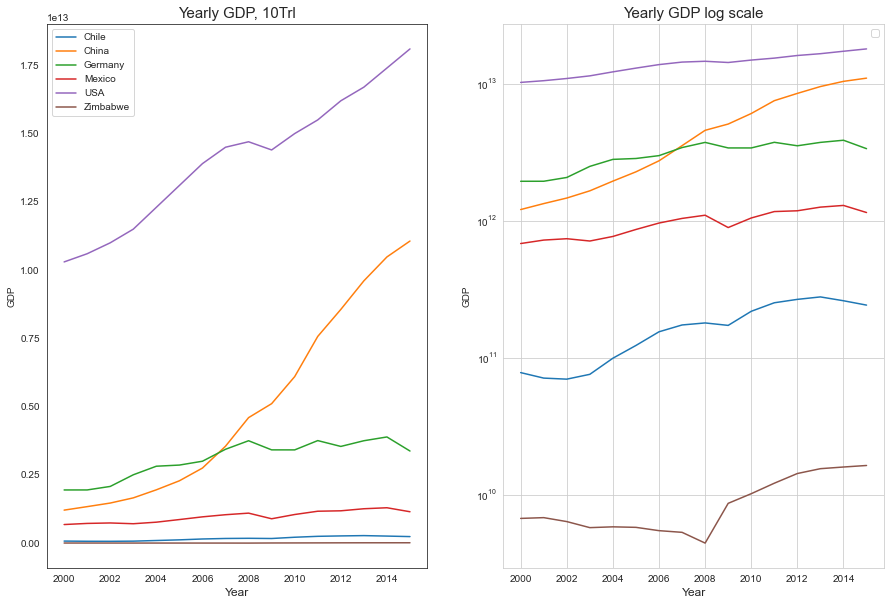

GDP has increased over time for all nations. Important to note there was a drop of GDP during 2008-2009 (Finansial crisis time) for all countries exept China. USA still has biggest GDP, but China sweepingly rises. Germany seems to entered stagnation period after 2008


<Figure size 432x288 with 0 Axes>

In [9]:
# plot GDP over years for each country
plt.figure(figsize=(15, 10))
# Plot #1
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='GDP', data = df, hue = 'Country')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.title('Yearly GDP, 10Trl', fontsize=15)
plt.xlabel('Year', fontsize=12)

# PLot #2 log scale so Zimbabwe and Chile will be visible
plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='GDP', data = df, hue = 'Country').set(yscale='log')
plt.legend([])
plt.title('Yearly GDP log scale', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.show()
plt.clf()

# Conclusion statement
print("GDP has increased over time for all nations. Important to note there was a drop of GDP during 2008-2009 (Finansial crisis time) for all countries exept China. USA still has biggest GDP, but China sweepingly rises. Germany seems to entered stagnation period after 2008")

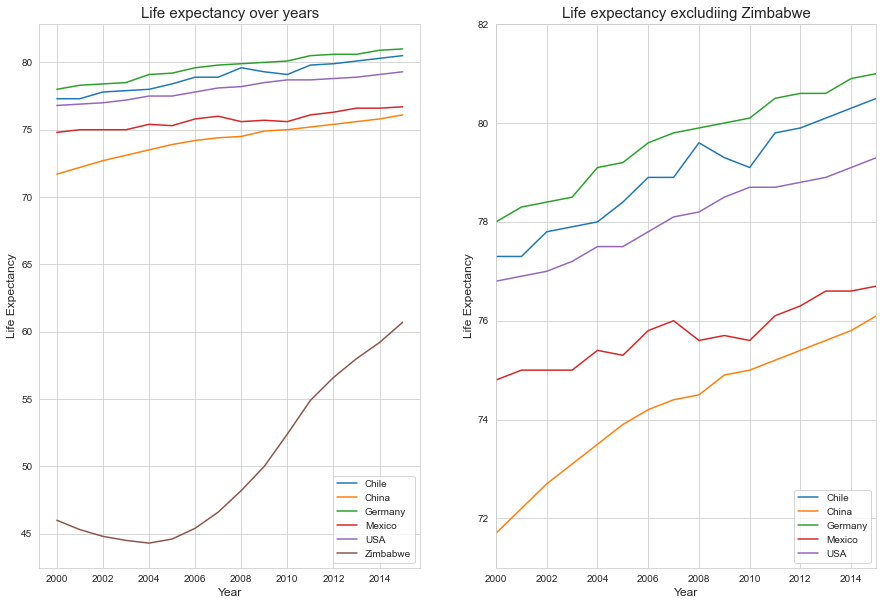

Life expectancy rises over time for all nations. Zimbabwe made a notable jump up of 16years, but still lowest amoung group. 


<Figure size 432x288 with 0 Axes>

In [4]:
# Life Expectancy over Years
plt.figure(figsize=(15, 10))
# Plot #1 
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='life_exp', data = df, hue = 'Country')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.title('Life expectancy over years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)

# Plot #2 Without Zimbabwe
plt.subplot(1,2,2)
sns.lineplot(x='Year', y='life_exp', data = df, hue = 'Country')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA'], loc = 4)
plt.title('Life expectancy excludiing Zimbabwe', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
# Zooming in chart
plt.axis([2000, 2015, 71, 82])
plt.show()
plt.clf()

# Conclusion statement
print("Life expectancy rises over time for all nations. Zimbabwe made a notable jump up of 16years, but still lowest amoung group. ")

Is there a correlation between GDP and life expectancy of a country?

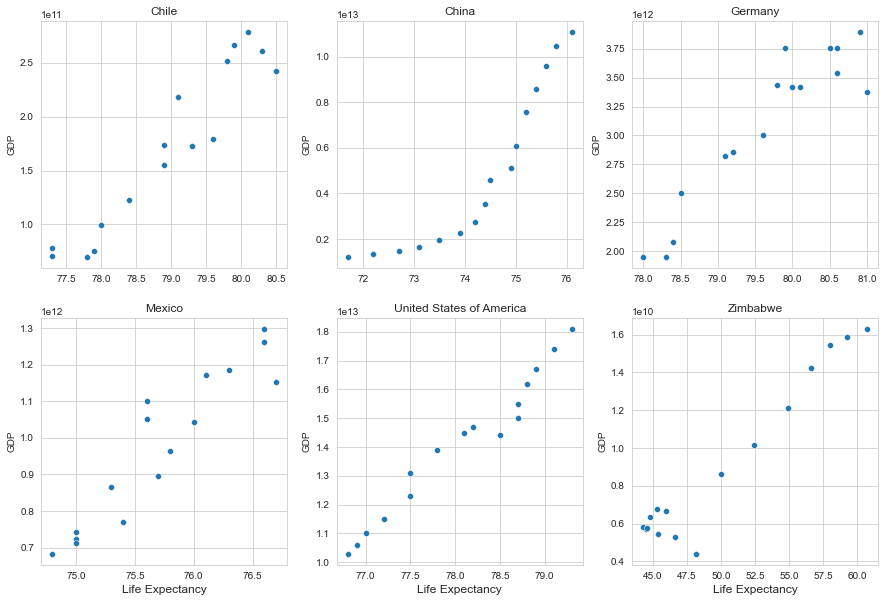

Strong positive correlation is seen for all countries. With GDP increase Life expectancy goes up as well.


<Figure size 432x288 with 0 Axes>

In [5]:
# Life expectancy Vs GDP
plt.figure(figsize=(15, 10))
# function to generate charts
counter = 0
for i in df.Country.unique():
    b = df[(df.Country == i)]
    counter += 1 
    # ploting scatter plot for all countries
    plt.subplot(2,3,counter)
    sns.scatterplot(x='life_exp', y='GDP', data = b)
    if counter > 3:
        plt.xlabel('Life Expectancy', fontsize=12)
    else:
        plt.xlabel('')
    plt.title(i)
    
plt.show()
plt.clf()
# Conclusion statement
print("Strong positive correlation is seen for all countries. With GDP increase Life expectancy goes up as well.")

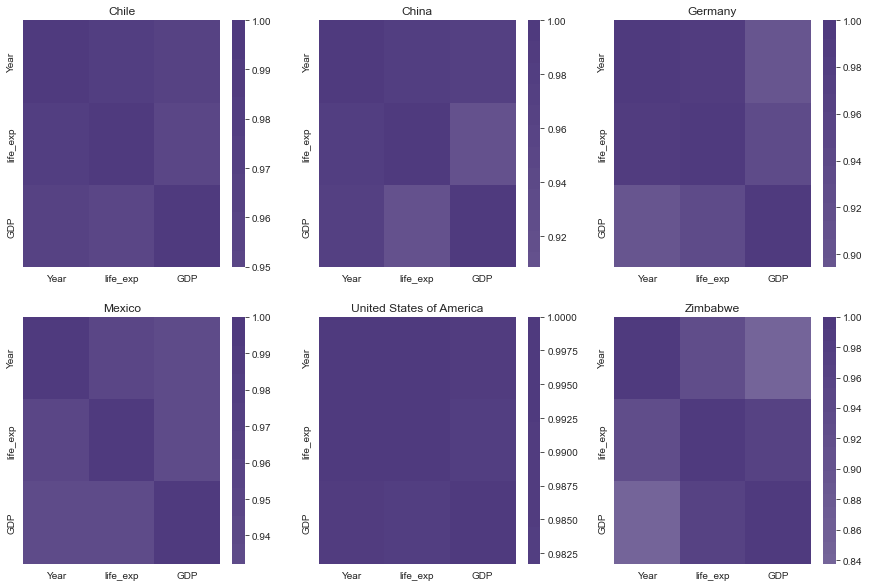

For all countries correlation between GDP and Life expectancy is above 0.8


<Figure size 432x288 with 0 Axes>

In [6]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
# function to generate charts
counter = 0
for i in df.Country.unique():
    b = df[(df.Country == i)]
    counter += 1 
    plt.subplot(2,3,counter)
    # ploting correlation heatmap for all countries
    colors = sns.diverging_palette(150, 275, s=50, l=30, n=9, as_cmap=True, sep=80)
    sns.heatmap(b.corr(), center=0, cmap=colors, robust=True)
    plt.title(i)
    
plt.show()
plt.clf()
# Conclusion statement
print('For all countries correlation between GDP and Life expectancy is above 0.8')

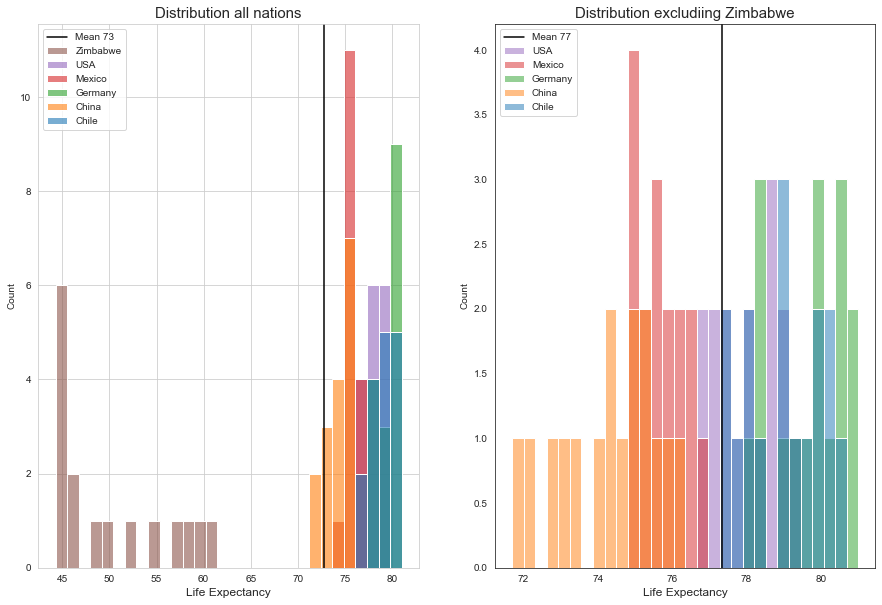

Life expectancy distribution is skewed, since Zimbabwe values are outliers in our dataset. It brings down the average life expectancy to around 73 years. If we remove Zimbabwe from our dataset we get normal distribution with majority values falling into 75-79 years and average life expectancy is around 77 years. Germany has the highest life expectancy.


<Figure size 432x288 with 0 Axes>

In [7]:
# Life expectancy distribution
plt.figure(figsize=(15, 10))
# Plot #1 all nations
plt.subplot(1,2,1)
sns.set_style('white')
sns.histplot(data = df,x='life_exp', bins=30, hue='Country', alpha=0.6)
mean = plt.axvline(x=df.life_exp.mean(),color='black')
plt.legend(['Mean {}'.format(round(df.life_exp.mean())),'Zimbabwe','USA' ,'Mexico','Germany','China','Chile'], loc=2)
plt.title('Distribution all nations', fontsize=15)
plt.xlabel('Life Expectancy', fontsize=12)

# Plot #2 without Zimbabwe
plt.subplot(1,2,2)
zimbabwe_out = df[(df.Country != 'Zimbabwe')]
sns.set_style('white')
mean = plt.axvline(x=zimbabwe_out.life_exp.mean(),color='black')
sns.histplot(data = zimbabwe_out,x='life_exp', bins=30, hue='Country',alpha=0.5)
plt.legend(['Mean {}'.format(round(zimbabwe_out.life_exp.mean())),'USA','Mexico','Germany','China','Chile'],loc=2)
plt.xlabel('Life Expectancy', fontsize=12)
plt.title('Distribution excludiing Zimbabwe', fontsize=15)
plt.show()
plt.clf()

# Conclusion statement
print('Life expectancy distribution is skewed, since Zimbabwe values are outliers in our dataset. It brings down the average life expectancy to around 73 years. If we remove Zimbabwe from our dataset we get normal distribution with majority values falling into 75-79 years and average life expectancy is around 77 years. Germany has the highest life expectancy.')

Does highest GDP equals to highest life expectancy?

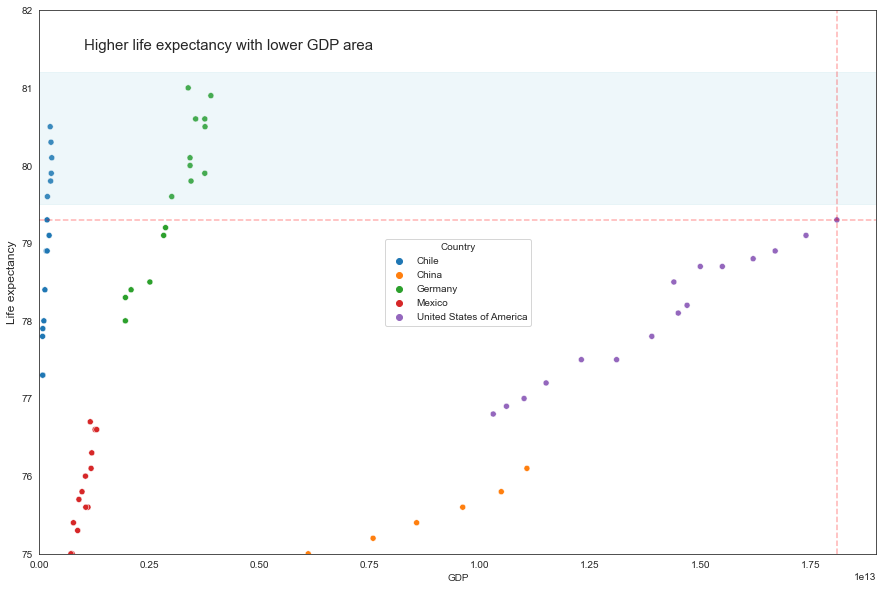

As we can see from the chart above highest GDP does not equal to the highest life expectancy. But the GDP grow over time does produce life expectancy grow as well.


<Figure size 432x288 with 0 Axes>

In [8]:
# Calculation of y point for the highest GDP
usa = df[(df.Country == 'United States of America')]
usa_max_y_point = float(usa[usa.GDP==np.max(usa.GDP)].life_exp)
# GDP Vs Life Expectancy without Zimbabwe
plt.figure(figsize=(15, 10))
sns.set_style('white')
sns.scatterplot(x='GDP', y='life_exp', data = zimbabwe_out, hue='Country')
# ploting max GDP lines
plt.axvline(x=np.max(df.GDP), linestyle ="--", color='red', alpha=0.3)
plt.axhline(y=usa_max_y_point, linestyle ="--", color='red', alpha=0.3)
# Area where life expectancy is high but GDP is low
plt.axhspan(79.5, 81.2, color='lightblue', alpha=0.2)
plt.text(0.1e13,81.5,"Higher life expectancy with lower GDP area",fontsize=15)
# Zooming in chart
plt.axis([0, 1.9e13, 75, 82])
plt.ylabel('Life expectancy', fontsize=12)
plt.show()
plt.clf()
# Conclusion statement
print('As we can see from the chart above highest GDP does not equal to the highest life expectancy. But the GDP grow over time does produce life expectancy grow as well.')

***Conclusions:***

* Life expectancy growth has positive correlation with GDP growth.
* Highest GDP in the world doesn't equals to the highest life expectancy in the world.
* China GDP is raising rapidly. Wasn't affected by 2008 Financial crisis as much as for others.
* Zimbabwe's life expectancy is lowest yet growing rapidly comparing to others.
* Chile stands out from the group with high life expectancy yet GDP is one of the lowest.
* For the most nations life expectancy falls into range of 75 to 79 years. With the mean of 77.